# **K-Nearest Neighbor using scikit-learn**

## **Learning Objective**
 
In the reading notebook, we implemented k-Nearest Neighbor(KNN) on the Fisher's iris dataset, where the task was to predict which class an unidentified iris plant belongs based on the sepal and petal measurements. This notebook is a clean version for the same problem containing only the codes for the complete machine learning pipeline of KNN.


# **Importing necessary libraries**

Let’s start by importing all the required libraries.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from mlxtend.plotting import plot_decision_regions

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)


# **Exploring the dataset**

[Fisher's iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a popular multivariate dataset often used in machine learning. The dataset consists of 150 samples evenly distributed among three species of iris: iris setosa, iris virginica, iris versicolor. Each sample consists of four attributes: the length and width, in centimenters, of the sepals and the petals. The task is to predict which class an unidentified iris plant belongs based on the sepal and petal measurements.



In [ ]:
dataset = datasets.load_iris()
df = pd.DataFrame(data=np.c_[dataset['data'], dataset['target']],
                    columns=dataset['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## **Dataset descriptions**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


The dataset has `150` samples with `4` features. All the features have numeric value.

In [ ]:
dict(zip( dataset.target_names, df['target'].unique()))

{'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0}

We have 3 unique classes where:
- `0` represents Setosa
- `1` represents Versicolor
- `2` represents Virginica

In [ ]:
temp_df = df.copy()

temp_df['target'] = temp_df['target'].map(dict(zip( temp_df['target'].unique(), dataset.target_names)))

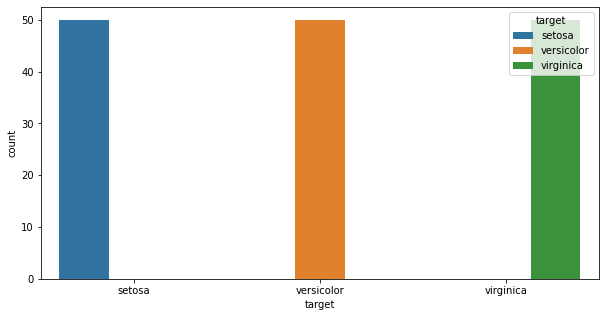

In [ ]:
sns.countplot(x='target', hue='target', data=temp_df)

From the plot above, we can see that our data is perfectly balanced.

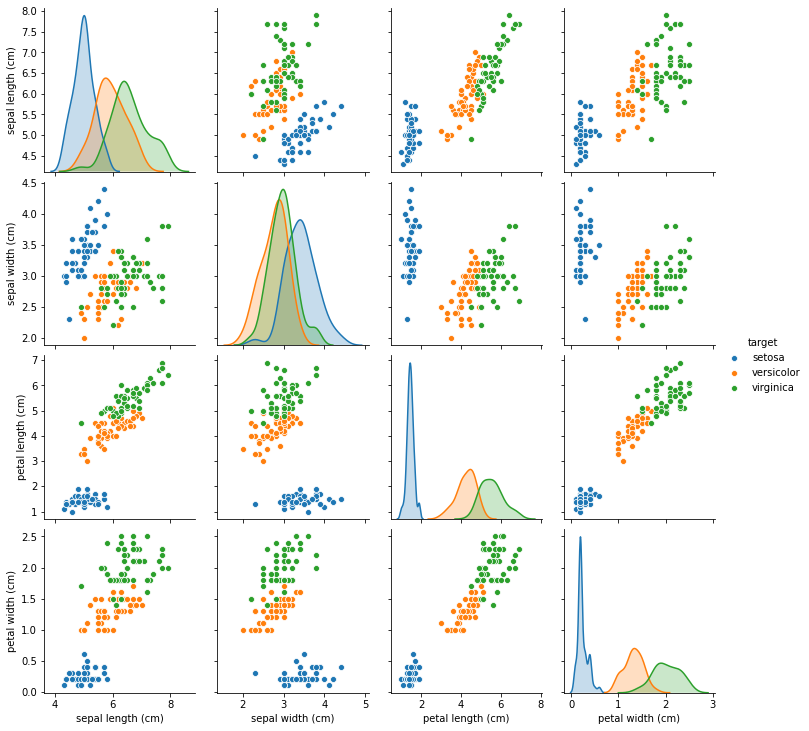

In [ ]:
sns.pairplot(temp_df, hue='target')

In the plot above, we can see the relationship between each features. We can see if the features are separable or not.

# **KNN synthetic dataset**

In [2]:
from IPython.display import display, Javascript, HTML
from IPython.display import IFrame
display(HTML('build.html'))

# **KNN Models**
Now we will build different models for different pairs of features to see how useful the features are to determine their species.

In [ ]:
# Helper functions

def display_confusion_matrix(
    matrix, labels=None,
    title="Confusion Matrix",
    xlabel="Predicted",
    ylabel="Actual",
    figsize=None,
    cmap="Blues",
    vmin=None,
    vmax=None,
):
    """Display a confusion matrix. 
  
    Display the confusion matrix found in matrix using matplotlib.
  
    Parameters
    ----------
    matrix : array-like
        Confusion matrix to display, shape [n_classes, n_classes].
    
    labels : array-like, default=None
        Class labels for the confusion matrix, shape [n_classes].
        
    title : str, default='Confusion Matrix'
        Title displayed on the confusion matrix.
    
    xlabel : str, default='Predicted'
        x-label displayed on the confusion matrix.
    
    ylabel : str, default='Actual'
        y-label displayed on the confusion matrix.
    
    figsize : array-like
        Array-like, length two, specifying the figsize of the plot.
        
    cmap : matplotib.colors.Colormap or str, default='Blues'
        Colormap used when displaying the entries of the confusion matrix.
        
    vmin,vmax : int or float
        *vmin* and *vmax* define the data range that the colormap covers.
    """
    
    if labels is None:
        labels = [""]*len(matrix)
    if vmin is None:
        vmin = 0.
    if vmax is None:
        vmax = np.sum(matrix[0])
    t_hold = (vmax-vmin) / 2.
    fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(matrix, cmap=cmap)
    for row,col in itertools.product(range(len(labels)), range(len(labels))):
        color = "white" if matrix[row,col] > t_hold else "black"
        ax.text(col, row, matrix[row, col], horizontalalignment="center", color=color)
    tick_marks = np.arange(len(labels))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=40, ha="right")
    ax.set_ylabel(ylabel)
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    plt.show()

## **Model 1 (Sepal Length & Sepal Width)**

To start with, we are going to build a KNN model with Sepal Length & Sepal Width. We will train the model with these two features and evaluate how it performed using the classification map and the confusion matrix.

In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)']]

model_1 = KNeighborsClassifier()
model_1.fit(X, y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## **Model 1 Evaluation**

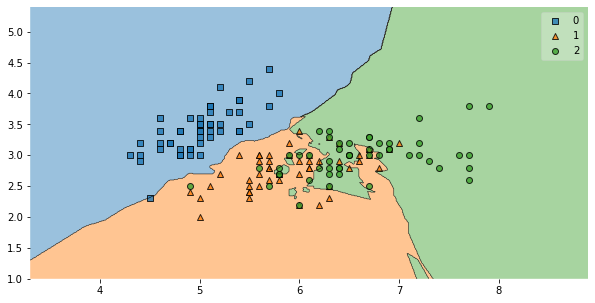

In [ ]:
plot_decision_regions(X.values, y_true.values.astype(np.integer), model_1)

[[49  1  0]
 [ 0 38 12]
 [ 0 12 38]]


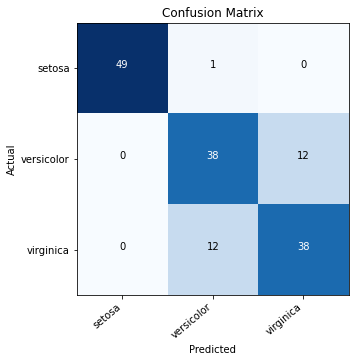

In [ ]:
y_hat = model_1.predict(X)
labels = df["target"].unique()

matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)
print(matrix)

display_confusion_matrix(matrix, dataset.target_names)

# **Model 2 (Petal Length & Petal Width)**

Now for our second model, we are going to use the Petal length and petal width features as an input.


In [ ]:
X = df[['petal length (cm)', 'petal width (cm)']]

model_2 = KNeighborsClassifier()
model_2.fit(X, y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## **Model 2 Evaluation**

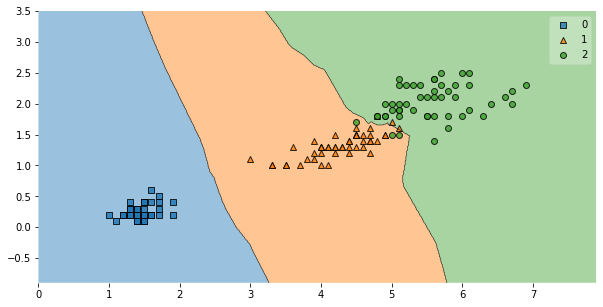

In [ ]:
plot_decision_regions(X.values, y_true.values.astype(np.integer), model_2)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


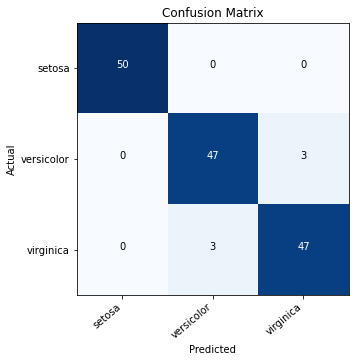

In [ ]:
y_hat = model_2.predict(X)

matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)
print(matrix)

display_confusion_matrix(matrix, dataset.target_names)

# **Model 3 (All features)**

Now for our final model, we are going to use all the available features and train our KNN model.


In [ ]:
X = df.drop(['target'], axis=1)

In [ ]:
model_3 = KNeighborsClassifier()
model_3.fit(X, y_true)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## **Model 3 Evaluation**

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


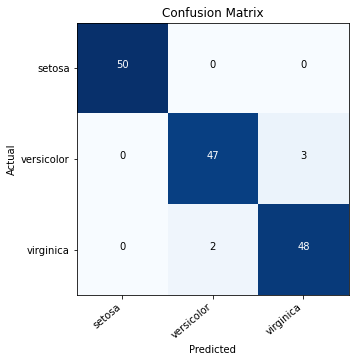

In [ ]:
y_hat = model_3.predict(X)

matrix = confusion_matrix(y_true, y_hat, labels=labels, normalize=None)
print(matrix)

display_confusion_matrix(matrix, dataset.target_names)

You can see that out final model with all features performed better than all other models. There are less misclassification. 

However, upto now, we have trained and evaluated our models in same dataset. It is not a good practice to use same data for training and evaluation.



# **Model on splitted dataset**
Here, we will split our dataset into train and test set and train our model in training set. Later during evaluation we are going to use our isolated test set.

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
preds = knn.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


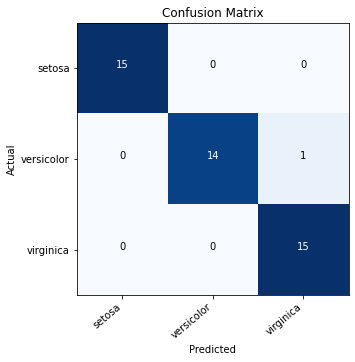

In [ ]:
matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)
print(matrix)

display_confusion_matrix(matrix, dataset.target_names)

You can see above that we have 98% accuracy on our test data set. 

From the confusion matrix also we can see that we have very low misclassifications. 

For our above models also, we can use train and test data separately and evaluate those models then pick the best model.